<a href="https://colab.research.google.com/github/VivekKamisetty/cs666student/blob/main/CS666_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# NAME: Vivek Kamisetty

In [ ]:
# In this assignment, we will visualize and explore a CT scan!

**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [ ]:
# Please download https://cs666.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [5]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?


In [8]:
# load numpy and matplotlib
%pylab inline
import os

Populating the interactive namespace from numpy and matplotlib


In [6]:
# we are using pydicom, so lets install it!
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.6 MB/s eta 0:00:00


In [ ]:
# TODO:
# 220 slices

In [ ]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [ ]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click. This should not be volume
# rendering but show the 3 cross sections.

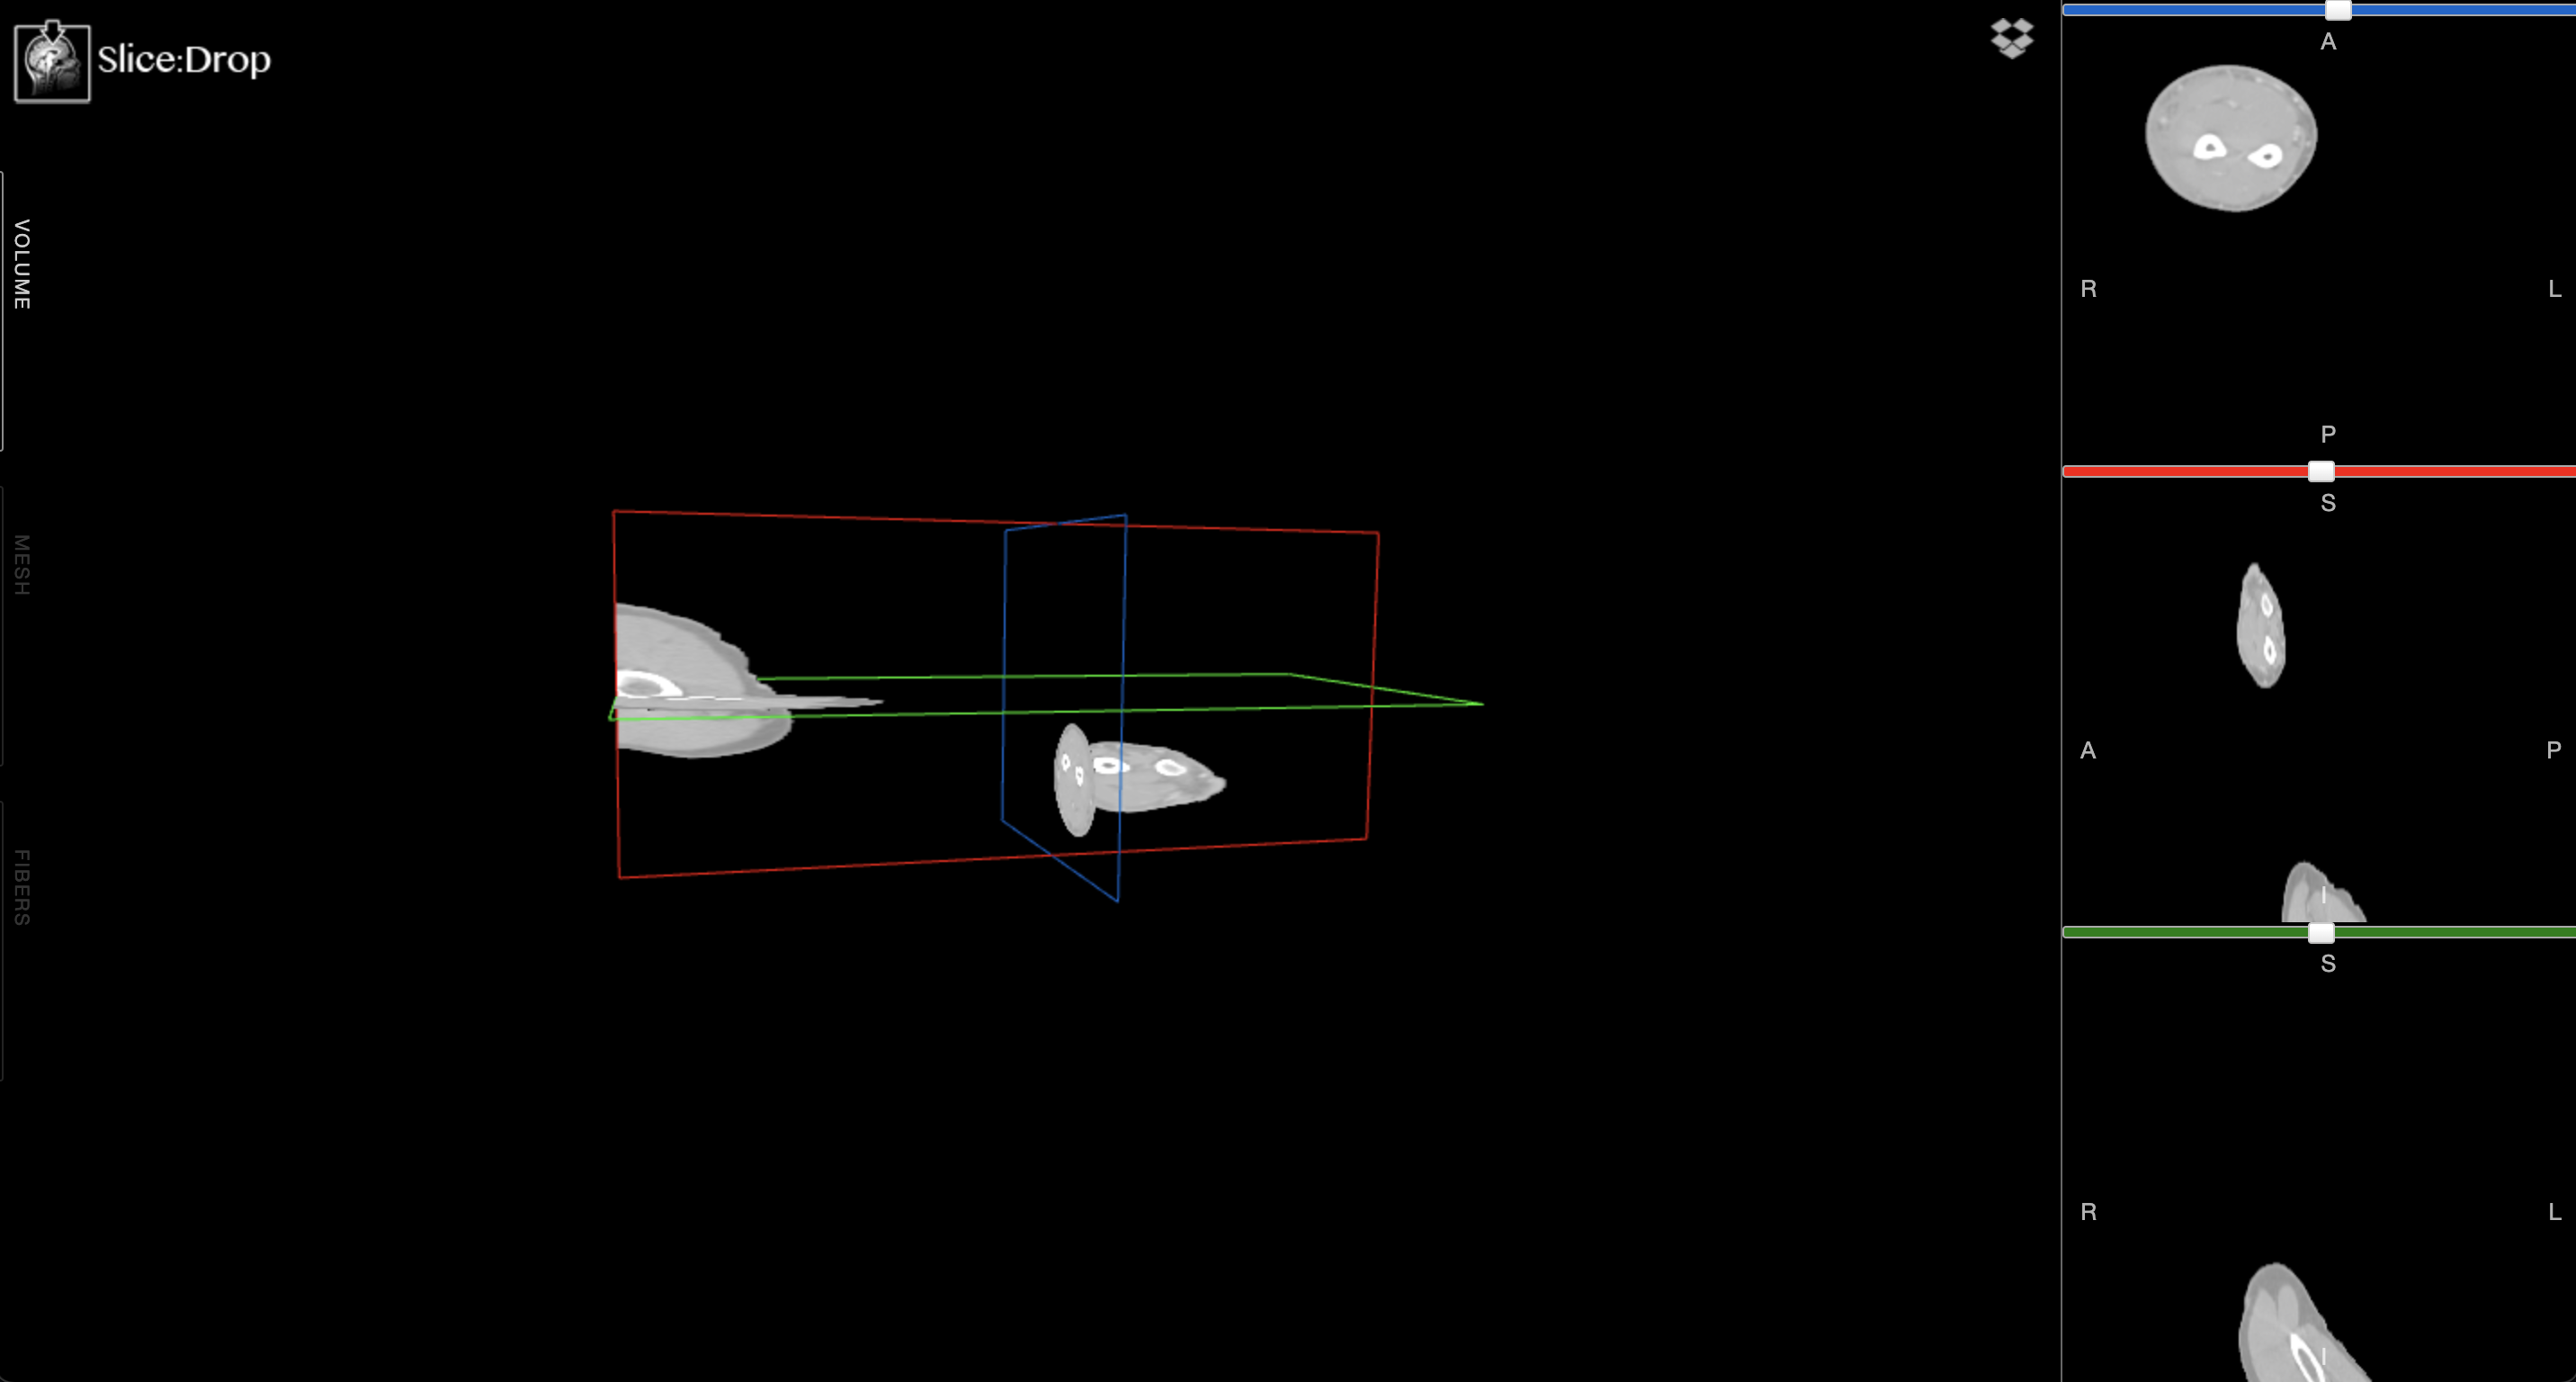

In [ ]:
# 3) Let's visualize only the bones! Please use the thresholding
# based on a window suitable for bones and show a 3D volume rendering.

In [ ]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

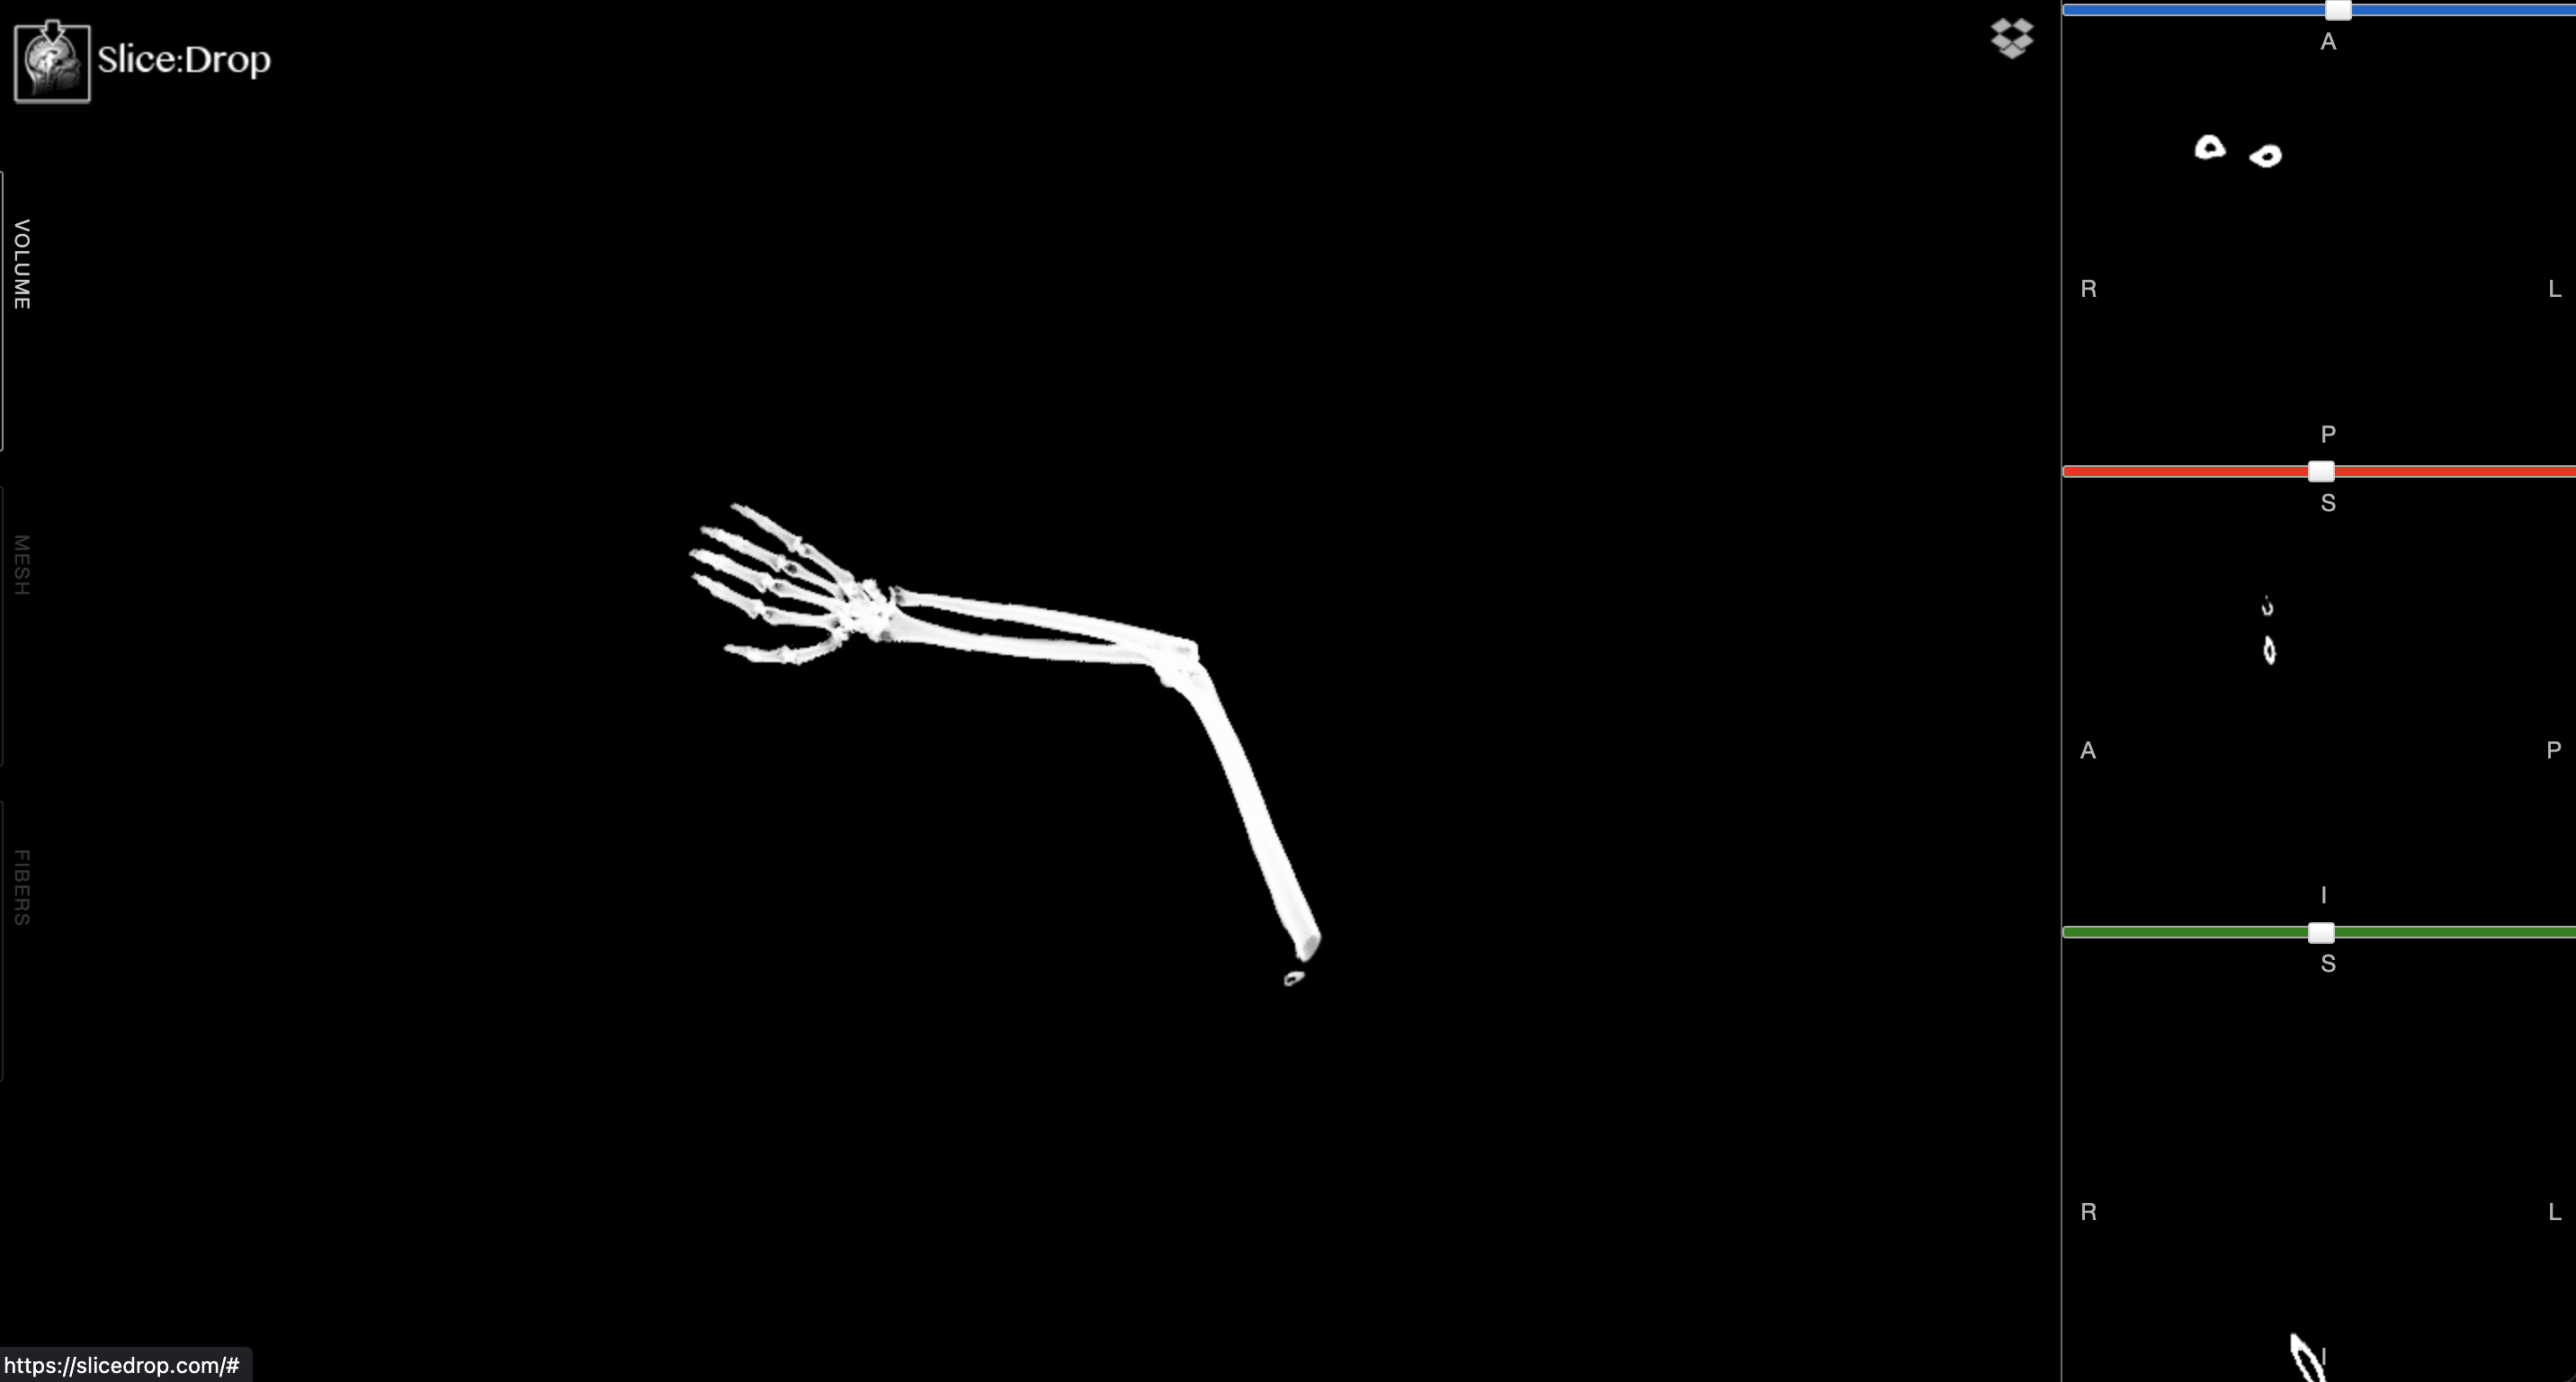

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [ ]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [36]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [ ]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [44]:
import numpy as np
import os
from pydicom import dcmread

directory_path = "ct"

# list all DICOM files in directory
file_list = sorted(os.listdir(directory_path))

first_file_path = os.path.join(directory_path, file_list[0])
first_file = dcmread(first_file_path)
dimensions = list(first_file.pixel_array.shape) + [len(file_list)] # final array dimensions

# load all DICOM files into a list of NumPy arrays
dicom_arrays = [dcmread(os.path.join(directory_path, file_name)).pixel_array for file_name in file_list]

# stack the arrays along the z-axis to create the final 3D array
ct_scan_array = np.stack(dicom_arrays, axis=-1)

In [ ]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

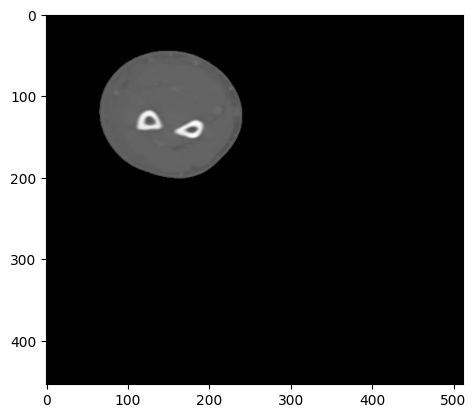

In [45]:
# TODO: YOUR CODE FOR AXIAL
import matplotlib.pyplot as plt

axial = plt.plot()
plt.imshow(ct_scan_array[:, :, dimensions[2]//2], cmap='gray')

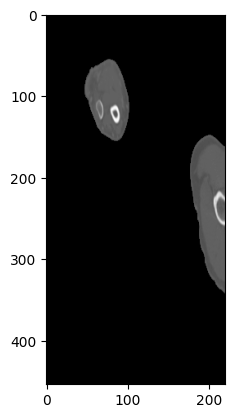

In [48]:
# TODO: YOUR CODE FOR SAGITTAL
import matplotlib.pyplot as plt

sagittal = plt.plot()
plt.imshow(ct_scan_array[:, dimensions[1]//2, :], cmap='gray')

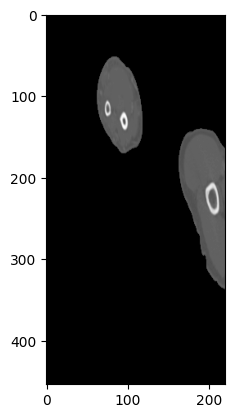

In [49]:
# TODO: YOUR CODE FOR CORONAL
import matplotlib.pyplot as plt

coronal = plt.plot()
plt.imshow(ct_scan_array[:, dimensions[0]//2, :], cmap='gray')

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [ ]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [ ]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

In [57]:
# TODO: YOUR CODE
#print(dicom_file.WindowCenter)
Window_Center = dicom_file.WindowCenter
Window_Width = dicom_file.WindowWidth
Rescale_Intercept = dicom_file['RescaleIntercept'].value
print(Window_Center, Window_Width, Rescale_Intercept)

30 410 -1024


In [ ]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

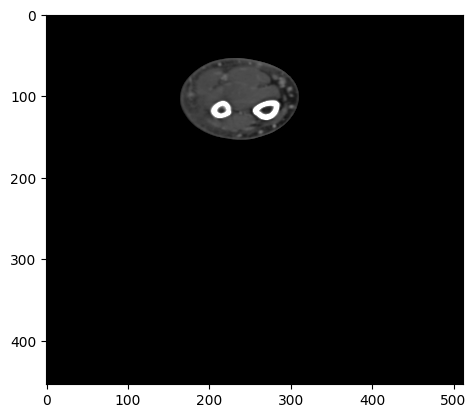

In [61]:
# TODO: YOUR CODE
vmin = Window_Center - Window_Width/2
vmax = Window_Width + Window_Width/2
plt.imshow(dicom_file.pixel_array + Rescale_Intercept, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

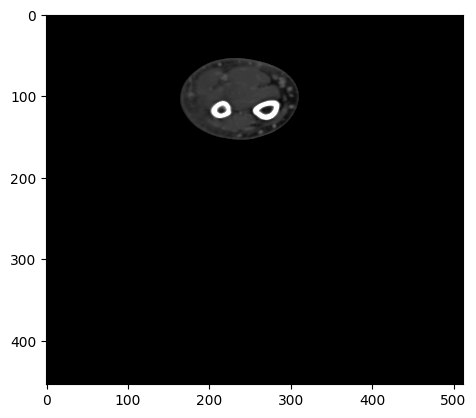

In [68]:
Window_Center = 100
Window_Width = 500
vmin = Window_Center - Window_Width/2
vmax = Window_Width + Window_Width/2
plt.imshow(dicom_file.pixel_array + Rescale_Intercept, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

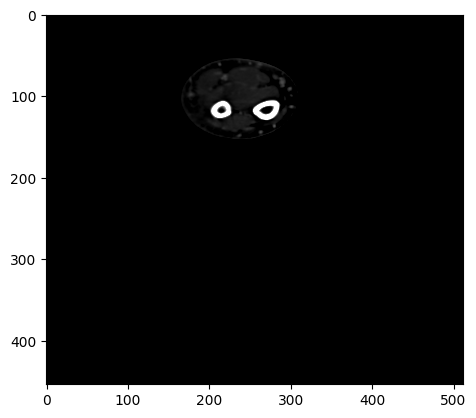

In [70]:
Window_Center = 200
Window_Width = 400
vmin = Window_Center - Window_Width/2
vmax = Window_Width + Window_Width/2
plt.imshow(dicom_file.pixel_array + Rescale_Intercept, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

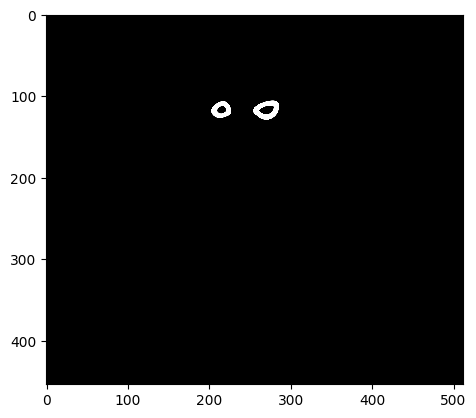

In [74]:
Window_Center = 500
Window_Width = 300
vmin = Window_Center - Window_Width/2
vmax = Window_Width + Window_Width/2
plt.imshow(dicom_file.pixel_array + Rescale_Intercept, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

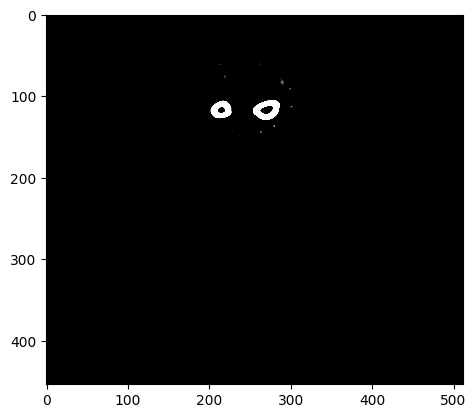

In [80]:
Window_Center = 200
Window_Width = 150
vmin = Window_Center - Window_Width/2
vmax = Window_Width + Window_Width/2
plt.imshow(dicom_file.pixel_array + Rescale_Intercept, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [ ]:
# Which values make sense and why?

In [ ]:
# TODO: YOUR ANSWER

In [ ]:
# It has been observed that the window and level values are significant factors in determining the brightness of an 
# image. Essentially, the image's brightness is dependent on the window and level values used. For instance, a window 
# of 200 and a level of 150 may provide optimal visualization of the image.

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [ ]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

In [89]:
# TODO: YOUR CODE TO SEGMENT FAT
fat_mask = ct_scan_array.copy()
fat_mask[(fat_mask > -190) | (fat_mask < -30)] = 0
fat_mask[fat_mask >= -30] = 1
fat_mask = np.int16(fat_mask)

In [90]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE
soft_tissue_mask = ct_scan_array.copy()
soft_tissue_mask[(soft_tissue_mask < 0) | (soft_tissue_mask >= 100)] = 0
soft_tissue_mask[soft_tissue_mask > 0] = 1
soft_tissue_mask = np.int16(soft_tissue_mask)

In [91]:
# TODO: YOUR CODE TO SEGMENT BONES
bone_mask = ct_scan_array.copy()
bone_mask[bone_mask < 700] = 0
bone_mask[bone_mask >= 3000] = 0
bone_mask[bone_mask > 0] = 1
bone_mask = np.int16(bone_mask)

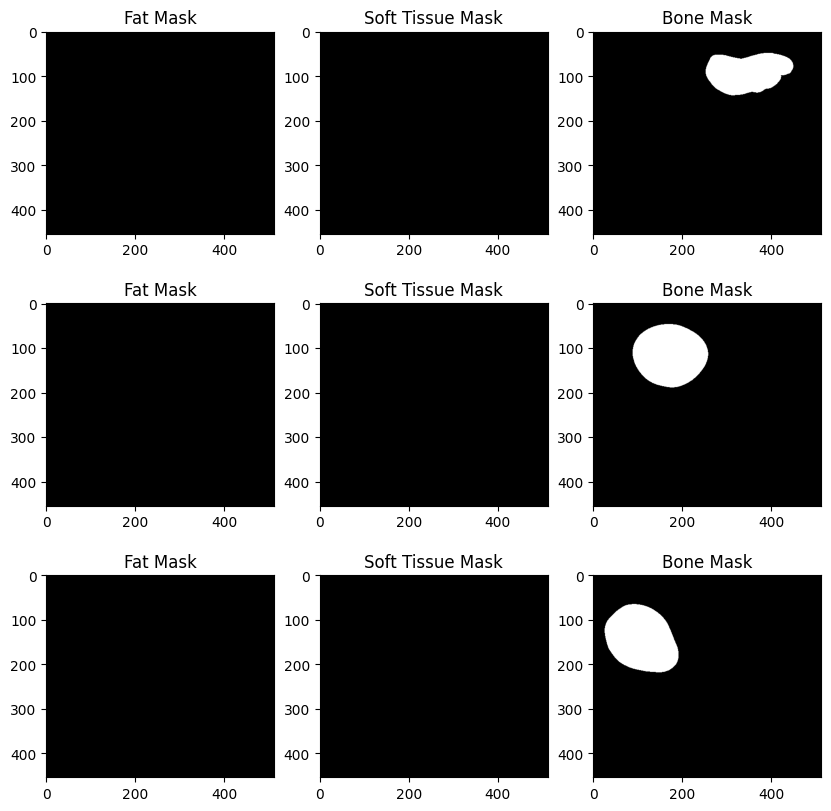

In [93]:
slices = [50, 100, 150] # Example slices to display
titles = ['Fat Mask', 'Soft Tissue Mask', 'Bone Mask']

fig, axs = plt.subplots(3, 3, figsize=(10, 10))

for i in range(len(slices)):
    axs[i, 0].imshow(fat_mask[:, :, slices[i]], cmap='gray')
    axs[i, 0].set_title(titles[0])
    axs[i, 1].imshow(soft_tissue_mask[:, :, slices[i]], cmap='gray')
    axs[i, 1].set_title(titles[1])
    axs[i, 2].imshow(bone_mask[:, :, slices[i]], cmap='gray')
    axs[i, 2].set_title(titles[2])

plt.show()

In [ ]:
# Are the segmentations good?

In [ ]:
# TODO: YOUR ANSWER
# No, The segmentations for Fat and Soft Tissue are not effective because the dataset does not contain appropriate 
# Hounsfield Unit thresholds to accurately distinguish these components from the data. As a result, the segmentations 
#do not perform as well as anticipated.

In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""